In [10]:
import math

def f(x):
    return x**3 + 3 * x**2 - 3*x - 9

def xk(raz, dwa):
    r = raz - (f(raz)*(raz - dwa)) / (f(raz) - f(dwa))
    return r


    
f(-3)

0

In [2]:
z = 7
i = 0
while z > 0.00001:
    z = z/2
    i = i+1
print(i)

20


In [61]:
import math

class Wynik:
    def __init__(self, typ, x=None, y=None, fx=None, fy=None, ttk=None, start_y=None, start_x=None):
        self.typ = typ
        self.x = x
        self.y = y
        self.fx = fx
        self.fy = fy
        self.ttk = ttk
        self.start_x = start_x
        self.start_y = start_y
        
#     def __init__(self, typ):
#         self.typ = typ

def sieczne_krok(f, x, y):
    return x - (f(x) * (x - y)) / (f(x) - f(y))


def funkcja(x):
    return math.log(x**2) - math.sin(x) - 2

def sieczne(f, x, y, eps):
    ttk = 64
    start_x=x; start_y=y
    while ttk > 0 and abs(x-y) > eps:
        temp = sieczne_krok(f, x, y)
        x = y
        y = temp
        ttk = ttk - 1
#     print("Sieczne:")
#     print( "x: {}   y: {}   f(x): {}   f(y): {}    ttk: {}".format(x, y, f(x), f(y), ttk) )
    return Wynik("sieczne", x, y, f(x), f(y), ttk, start_x, start_y)
    
def który_mniejszy(x, y):
    if x < y:
        return x, y
    else:
        return y, x
    
def różne_znaki(x, y):
    if x * y < 0:
        return True
    else:
        return False
    
def bisekcja(f, x, y, eps):
    if not różne_znaki(f(x), f(y)):
#         print("f(x) i f(y) mają ten sam znak - a to niedobrze")
        return Wynik("bisekcja - znak")
    x, y = który_mniejszy(x, y)
    ttk = 64
    while ttk > 0 and abs(x - y) > eps:
        środek = (x + y) / 2
        if f(środek) < 0:
            x = środek
        else:
            y = środek
        ttk = ttk - 1
#     print("Bisekcja:")
#     print( "x: {}   y: {}   f(x): {}   f(y): {}    ttk: {}".format(x, y, f(x), f(y), ttk) )
    return Wynik("bisekcja", x, y, f(x), f(y), ttk)
    
def sieczne_plus(f, x, y, eps):
    if not różne_znaki(f(x), f(y)):
#         print("f(x) i f(y) mają ten sam znak - a to niedobrze")
        return Wynik("sieczne+ - znak")
    x, y = który_mniejszy(x, y)
    ttk = 64
    while ttk > 0 and abs(x - y) > eps:
        kolejny = sieczne_krok(f, x, y) 
        if f(kolejny) < 0:
            x = kolejny
        else:
            y = kolejny
        ttk = ttk - 1
#     print("Sieczne z plusem:")
#     print( "x: {}   y: {}   f(x): {}   f(y): {}    ttk: {}".format(x, y, f(x), f(y), ttk) )
    return Wynik("sieczne+", x, y, f(x), f(y), ttk)
    

e=0.00001
wyniki = []
r = [x for x in range (-8,-1)]
for i in r:
    for j in r:
        # i nie może być równe j, co więcej przedział nie może zawierać 0 (funkcja nie jest ciągła w 0)
        if i < j and i*j > 0:              
            wyniki.append(sieczne(funkcja,i,j,e))
            wyniki.append(bisekcja(funkcja,i,j,e))
            wyniki.append(sieczne_plus(funkcja,i,j,e))
            
sieczne_zbieżne = 0
sieczne_rozbieżne = 0
bisekcja_zbieżne = 0
bisekcja_znak = 0
sieczne_plus_zbieżne = 0
sieczne_plus_znak = 0

s_suma_ttk = 0
b_suma_ttk = 0
sp_suma_ttk = 0

punkty_złe_dla_siecznych = []
            
for j in wyniki:
    i = j.typ
    if i == "sieczne":
        if j.ttk > 0:
            sieczne_zbieżne += 1
            s_suma_ttk += j.ttk
        else:
            sieczne_rozbieżne += 1
            punkty_złe_dla_siecznych.append( (j.start_x, j.start_y) )
    if i == "bisekcja":
        bisekcja_zbieżne += 1
        b_suma_ttk += j.ttk
    if i == "bisekcja - znak":
        bisekcja_znak += 1
    if i == "sieczne+":
        sieczne_plus_zbieżne += 1
        sp_suma_ttk += j.ttk
    if i == "sieczne+ - znak":
        sieczne_plus_znak += 1
        
print( "S: {}  SR: {}  B: {}  BZ: {}  SP: {}  SPZ: {}".format(sieczne_zbieżne, sieczne_rozbieżne, bisekcja_zbieżne, bisekcja_znak, sieczne_plus_zbieżne, sieczne_plus_znak) )
s_średnia_ttk = s_suma_ttk / sieczne_zbieżne
sss = s_suma_ttk / (sieczne_zbieżne + sieczne_rozbieżne)
b_średnia_ttk = b_suma_ttk / bisekcja_zbieżne
sp_średnia_ttk = sp_suma_ttk / sieczne_plus_zbieżne
print( "s_średnia: {:=4.2f} ({:=4.2f})  b_średnia: {:=4.2f}  sp_średnia: {:=4.2f}".format(s_średnia_ttk, sss, b_średnia_ttk, sp_średnia_ttk) )

S: 19  SR: 2  B: 0  BZ: 21  SP: 0  SPZ: 21


ZeroDivisionError: division by zero

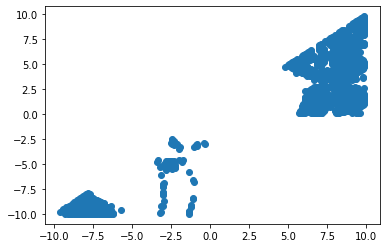

In [10]:
import matplotlib.pyplot as plt 

x=[]
y=[]
for i in range(len(punkty_złe_dla_siecznych)):
    x.append(punkty_złe_dla_siecznych[i][0])
    y.append(punkty_złe_dla_siecznych[i][1])

plt.scatter(x,y)

In [57]:
import math

class Wynik:
    def __init__(self, typ, x=None, dok=None, ttk=None, start_y=None, start_x=None):
        self.typ = typ
        self.x = x
        self.dok = dok
        self.ttk = ttk
        self.start_x = start_x
        self.start_y = start_y

def funkcja(x):
    return math.log(x**2) - math.sin(x) - 2

def który_mniejszy(x, y):
    if x < y:
        return x, y
    else:
        return y, x
    
def różne_znaki(x, y):
    if x * y < 0:
        return True
    else:
        return False

def sieczne_krok(f, x, y):
    return x - (f(x) * (x - y)) / (f(x) - f(y))

#Metoda Siecznych
def sieczne(f, x, y, eps):
    ttk = 64
    start_x=x; start_y=y
    while ttk > 0 and abs(x-y) > eps:
        temp = sieczne_krok(f, x, y)
        x = y
        y = temp
        ttk = ttk - 1
        dok=abs(x-y)
    if ttk==0: return Wynik("sieczne 64")
    else: return Wynik("sieczne", temp, dok, ttk, start_x, start_y)

#Metoda Bisekcji        
def bisekcja(f, x, y, eps):
    if not różne_znaki(f(x), f(y)):
        return Wynik("bisekcja - znak")
    ttk = 64
    while ttk > 0 and abs(x - y) > eps:
        srodek = (x + y) / 2
        if różne_znaki(f(y), f(srodek)): 
            x = srodek
        else: 
            y = srodek
        ttk = ttk - 1
    dok=abs(x - y)
    if ttk==0: return Wynik("bisekcja 64")
    else: return Wynik("bisekcja", srodek, dok, ttk)
    
#Metoda Siecznych+ - sieczne + reguły bisekcji
def sieczne_plus(f, x, y, eps):
    if not różne_znaki(f(x), f(y)): 
        return Wynik("sieczne+ - znak")
    ttk = 64
    while ttk > 0 and abs(x-y) > eps:
        kolejny = sieczne_krok(f, x, y)
        if różne_znaki(f(y), f(kolejny)):
            x = kolejny
        else:
            y = kolejny
        ttk = ttk - 1
        dok=abs(x-y)
    if ttk==0: return Wynik("sieczne+ 64")
    else: return Wynik("sieczne+", kolejny, dok, ttk)

def wypisz_wynik(f, x, y, eps):
    BW=bisekcja(f,x,y,eps)
    print("Bisekcja Wyniki:")
    if BW.typ=="bisekcja - znak": print("W tym przedziale nie ma miejsca zerowego, metoda nie zadziała!\n")
    if BW.typ=="bisekcja 64": print("Metoda dla podanego przykładnu nie zmieściła się w 64 krokach\n")
    if BW.typ=="bisekcja": print("Miejsce zerowe występuje w pobliżu x={} z dokladnością: {}, metoda wykonała {} kroków\n".format(BW.x, BW.dok, 64-BW.ttk))

    SW=sieczne(f,x,y,eps)
    print("Sieczne Wyniki: ")
    if SW.typ=="sieczne 64": print("Metoda dla podanego przykładnu nie zmieściła się w 64 krokach\n")
    if SW.typ=="sieczne": print("Miejsce zerowe występuje w pobliżu x={} z dokladnością: {}, metoda wykonała {} kroków\n".format(SW.x, SW.dok, 64-SW.ttk))
    
    SPW=sieczne_plus(f,x,y,eps)
    print("Sieczne+ Wyniki: ")
    if SPW.typ=="sieczne+ - znak": print("W tym przedziale nie ma miejsca zerowego, metoda nie zadziała!\n")
    if SPW.typ=="sieczne+ 64": print("Metoda dla podanego przykładnu nie zmieściła się w 64 krokach\n")
    if SPW.typ=="sieczne+": print("Miejsce zerowe występuje w pobliżu x={} z dokladnością: {}, metoda wykonała {} kroków\n".format(SPW.x, SPW.dok, 64-SPW.ttk))

wypisz_wynik(funkcja, -8, -1, 0.00001)

Bisekcja Wyniki:
Miejsce zerowe występuje w pobliżu x=-1.6513967514038086 z dokladnością: 6.67572021484375e-06, metoda wykonała 20 kroków

Sieczne Wyniki: 
Miejsce zerowe występuje w pobliżu x=-4.15470037489574 z dokladnością: 2.410734172286766e-07, metoda wykonała 13 kroków

Sieczne+ Wyniki: 
Miejsce zerowe występuje w pobliżu x=-1.651399904190019 z dokladnością: 4.440892098500626e-16, metoda wykonała 38 kroków



In [55]:
import math

class Wynik:
    def __init__(self, typ, x=None, dok=None, ttk=None, start_y=None, start_x=None):
        self.typ = typ
        self.x = x
        self.dok = dok
        self.ttk = ttk
        self.start_x = start_x
        self.start_y = start_y

def funkcja(x):
    return math.log(x**2) - math.sin(x) - 2

def który_mniejszy(x, y):
    if x < y:
        return x, y
    else:
        return y, x
    
def różne_znaki(x, y):
    if x * y < 0:
        return True
    else:
        return False

def sieczne_krok(f, x, y):
    return x - (f(x) * (x - y)) / (f(x) - f(y))

#Metoda Bisekcji        
def bisekcja(f, x, y, eps):
    if not różne_znaki(f(x), f(y)):
        return Wynik("bisekcja - znak")
    ttk = 64
    srodek=0
    while ttk > 0 and abs(x-y) > eps:
        srodek = (x + y) / 2
        if różne_znaki(f(y), f(srodek)): 
            x = srodek
        else: 
            y = srodek
        ttk = ttk - 1
    dok=abs(x - y)
    if ttk==0: return Wynik("bisekcja 64")
    else: return Wynik("bisekcja", srodek, dok, ttk)

#Metoda Siecznych
def sieczne(f, x, y, eps):
    ttk = 64
    start_x=x; start_y=y
    temp=0
    while ttk > 0 and abs(x-y) > eps:
        temp = sieczne_krok(f, x, y)
        x = y
        y = temp
        ttk = ttk - 1
        dok=abs(x-y)
    if ttk==0: return Wynik("sieczne 64")
    else: return Wynik("sieczne", temp, dok, ttk, start_x, start_y)

#Metoda Siecznych+ - sieczne + reguły bisekcji
def sieczne_plus(f, x, y, eps):
    if not różne_znaki(f(x), f(y)): 
        return Wynik("sieczne+ - znak")
    ttk = 64
    kolejny=0
    while ttk > 0 and abs(x-y) > eps:
        kolejny = sieczne_krok(f, x, y) 
        if różne_znaki(f(y), f(kolejny)):
            x = kolejny
        else:
            y = kolejny
        ttk = ttk - 1
        dok=abs(x-y)
    if ttk==0: return Wynik("sieczne+ 64")
    else: return Wynik("sieczne+", kolejny, dok, ttk)

BW=sieczne(funkcja, -2, -1, 0.1)
print(BW.x, BW.dok, 64-BW.ttk)

-1.7072751610336057 0.08944613797556222 2
